Since our model has so bad accuracy on N36-2 (sandflat), Dirk find the section is at the transition between chaanel and sandflat after checking it's description and location. He then gives more sandflat sections to test our model. However,  these sections are similar to N36-2 instead of the sections for training. We'll see how it goes...

Meanwhile, let's see how similarity is between the facies.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

#plt.style.use('ggplot')
plt.style.use('seaborn-colorblind')
#mpl.rcParams['xtick.labelsize'] = 8
#mpl.rcParams["image.cmap"] = 'gray'
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'

import datetime
date = datetime.datetime.now().strftime('%Y%m%d')

# Investigate facies similarity
I use the whole clr-transformed XRF data without further feature engineering as the data. Then take the mean and s.d. of each element in each facies to describe the characteristic of facies. The clustering algorithm is agglomerative clustering (ward's).

In [2]:
from wasafacies import PrepareData

prepare = PrepareData()
facies, id_list = prepare.create_recla()
norm_df = prepare.create_raw(facies=facies, id_list=id_list)

In [3]:
norm_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19016 entries, N13_01061 to N16_02908
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Si            19016 non-null  float64
 1   S             19016 non-null  float64
 2   Cl            19016 non-null  float64
 3   K             19016 non-null  float64
 4   Ca            19016 non-null  float64
 5   Ti            19016 non-null  float64
 6   Fe            19016 non-null  float64
 7   Br            19016 non-null  float64
 8   Rb            19016 non-null  float64
 9   Sr            19016 non-null  float64
 10  Zr            19016 non-null  float64
 11  Ba            19016 non-null  float64
 12  facies        19016 non-null  int64  
 13  core_section  19016 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 2.2+ MB


In [4]:
# the properties in each facies as input
norm_df.groupby('facies').agg(['mean', 'std'])

Si                   S                  Cl                   K  \
            mean       std      mean       std      mean       std      mean   
facies                                                                         
0       2.333496  0.465044 -1.763351  0.607541  1.365479  0.344765  1.671245   
1       1.030692  0.614453 -1.686521  0.511890  1.266718  0.384834  1.664498   
2       0.320269  0.324176 -1.452713  0.362580  0.501810  0.295449  1.677115   
3       2.258174  0.522944 -2.068505  0.701267  0.692776  0.735028  1.996717   
4       0.792222  0.363178 -1.181230  0.575457  0.651266  0.399016  1.756727   
5       0.284368  0.552975 -0.413147  0.574434  0.629507  0.532379  1.757503   
6      -0.528453  1.026163  0.655383  0.863461  1.776580  0.588828  0.866041   
7       1.798776  0.907443 -0.927350  0.732544  0.756192  0.477472  1.888580   
8       1.512493  0.426813 -1.644337  0.939733  0.539714  1.106023  2.382802   
9       2.204532  0.343011 -1.878527  0.727817  1.307560  0.582780  2.189039   

                        Ca            ...        Br                  Rb  \
             std      mean       std  ...      mean       std      mean   
facies                                ...                                 
0       0.394818  3.736943  1.158355  ... -4.790342  1.418852 -1.472818   
1       0.207620  3.004254  0.300742  ... -3.717194  1.550173 -1.517090   
2       0.095715  3.268740  0.168130  ... -2.450080  0.603937 -1.654483   
3       0.277689  2.890965  0.442547  ... -5.128151  1.340729 -1.180225   
4       0.158547  2.769182  0.525156  ... -3.149855  1.223371 -1.610861   
5       0.377250  1.210340  0.494907  ... -1.810689  0.735990 -1.429794   
6       0.432745  2.051421  0.409544  ... -1.157662  1.693841 -2.609153   
7       0.478496  1.425003  0.354739  ... -4.831720  1.594480 -1.317558   
8       0.246080  1.563466  0.578122  ... -5.571723  1.093648 -0.898567   
9       0.290617  1.103629  0.226113  ... -5.361451  1.083783 -0.945403   

                        Sr                  Zr                  Ba            
             std      mean       std      mean       std      mean       std  
facies                                                                        
0       0.652807 -0.186156  0.751426 -0.865249  0.719775 -1.261463  0.552568  
1       0.304665 -0.919790  0.224943 -0.289339  0.594701 -1.502746  0.379091  
2       0.160828 -0.949248  0.142809 -1.012583  0.369579 -2.034639  0.245535  
3       0.331813 -0.740884  0.291120  0.050277  0.605550 -1.161789  0.296748  
4       0.221586 -1.273189  0.364880 -0.561386  0.496525 -1.771080  0.284001  
5       0.362854 -1.750723  0.287829 -1.178404  0.404233 -1.616698  0.218639  
6       1.435710 -1.342608  0.649080 -1.499352  1.510258 -1.201072  0.335046  
7       0.594067 -1.159036  0.321895  0.323835  0.391336 -0.949000  0.359338  
8       0.372420 -0.978283  0.387136  0.057014  0.518696 -0.888433  0.365355  
9       0.349545 -1.022325  0.399779  0.284316  0.463574 -0.713205  0.240179  

[10 rows x 24 columns]

In [5]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [6]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(
    norm_df.groupby('facies').agg(['mean', 'std']).values
)


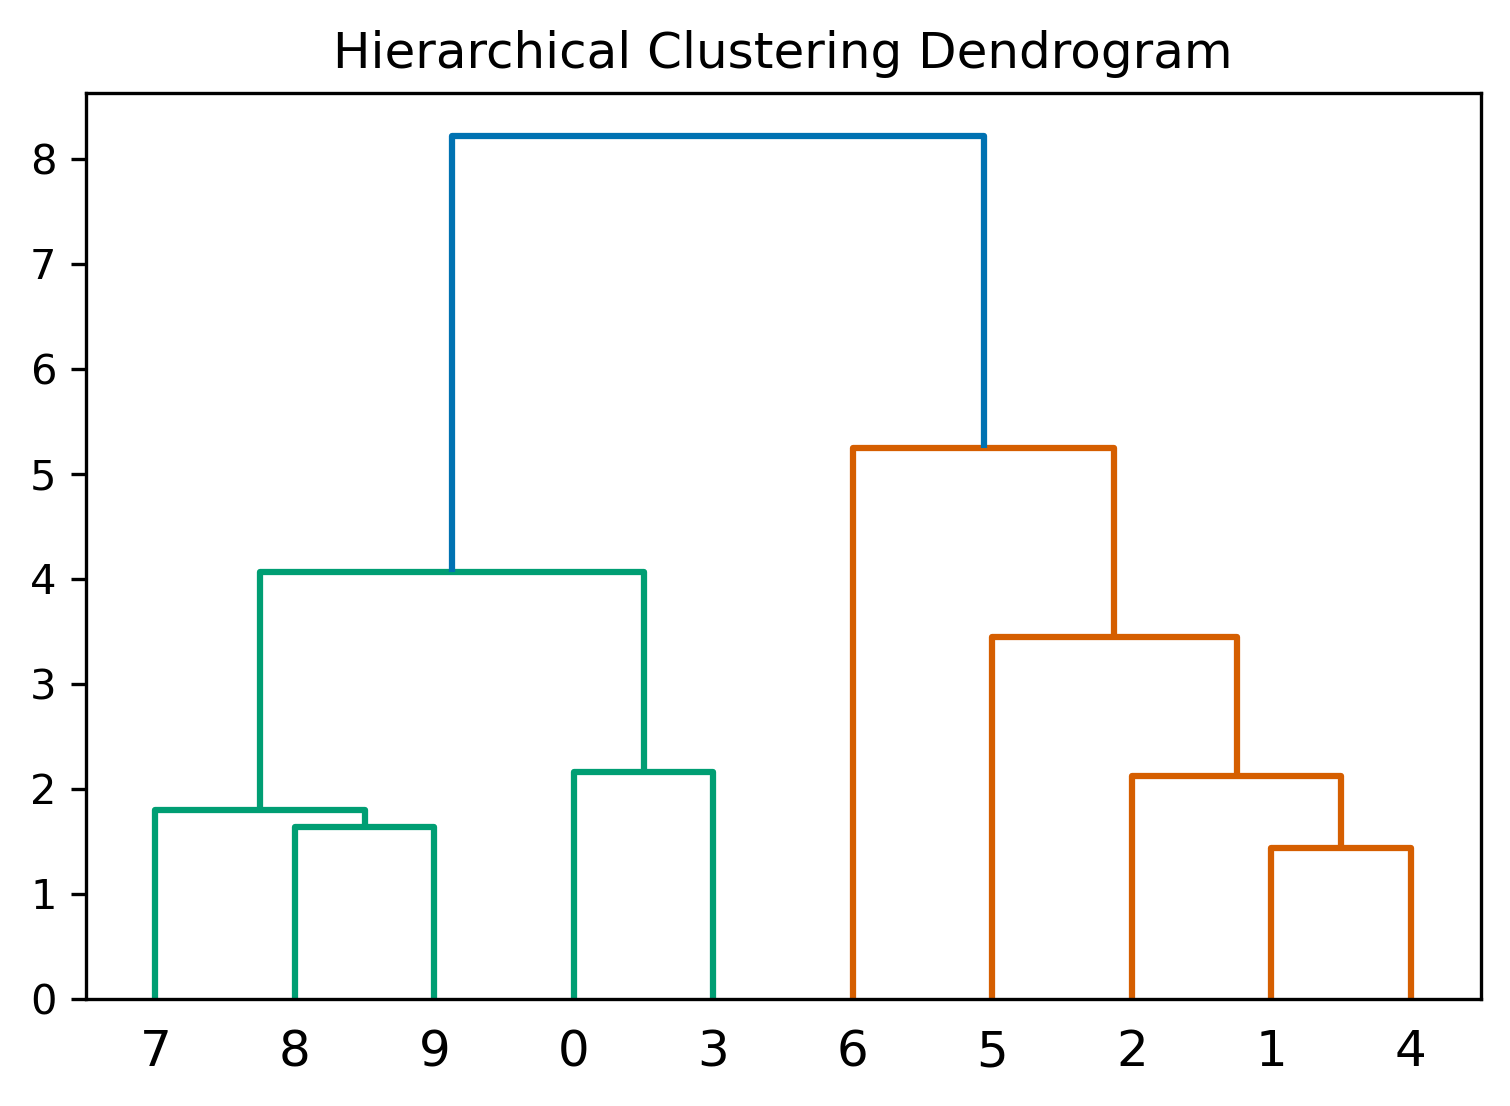

In [7]:
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(clustering, truncate_mode='level', p=3)

In [8]:
_, unique = pd.factorize(facies)

In [9]:
xticks = []
for i in [7, 8, 9, 0, 3, 6, 5, 2, 1, 4]:
    xticks.append(unique[i])

xticks

['so', 'pm', 'pef', 'hsm', 'sf', 'pt', 'la', 'lcf', 'hcf', 'mf']

/home/users/aslee/miniconda3/envs/wasafacies/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


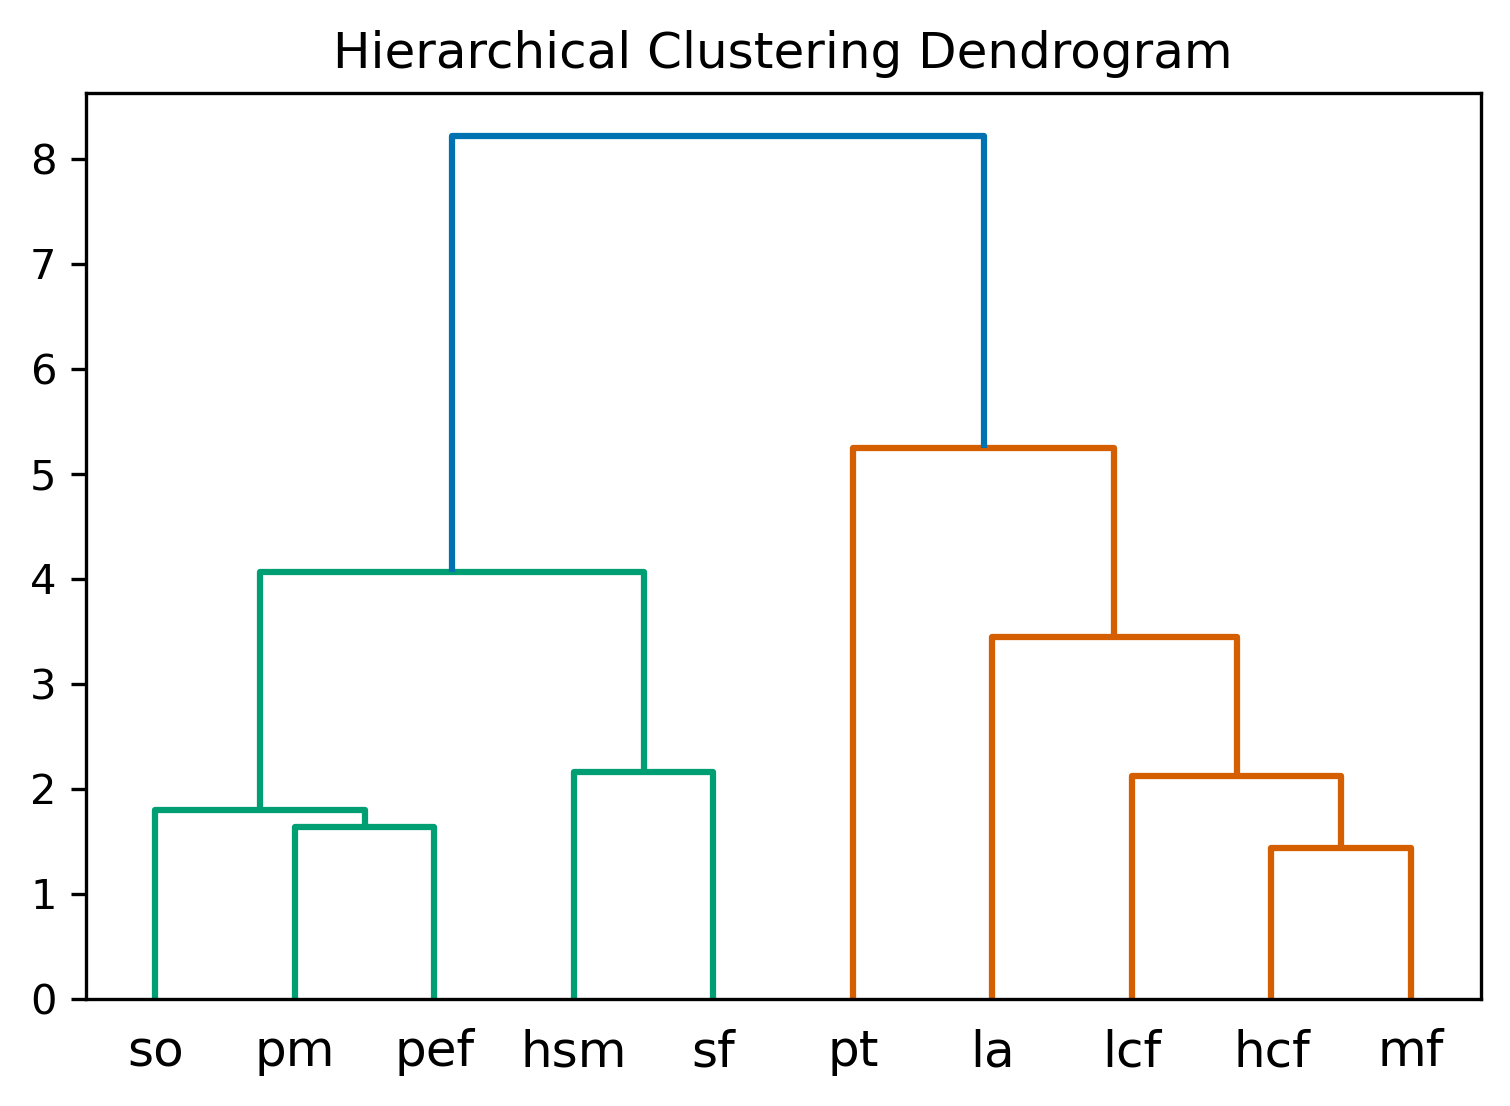

In [23]:
# modify the xticks to actual facies name
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(clustering, truncate_mode='level', p=3)
plt.xticks(ticks=plt.axes().get_xticks(), labels=xticks)
plt.savefig('results/facies_similarity_{}.png'.format(date))
